In [1]:
pip install GEOMINE

    PyYAML (>=5.1.*)
            ~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import GEOMINE  # not graphletorbit!

# Example graph from the docs
Example = np.matrix([
    [0,1,1,0,0,0],
    [1,0,1,0,0,0],
    [1,1,0,1,1,0],
    [0,0,1,0,0,0],
    [0,0,1,0,0,1],
    [0,0,0,0,1,0]
])




 Count orbits of order 4 with 1 vertex color and 1 edge colors
 Count(G, ref, k, sizev, sizee, connect = False}) ,
- G is the adjacency matrix of the graph,
- ref is
- k is the max number of verticies of the graphlets,
- sizev is the number of type of verticies
- **sizee is the number of types of edges +1**


In [3]:

result = GEOMINE.Count(Example, 1, 4, 1, 2, True)
print(result)

Before: (11, 10)
After: (9, 10)
[1 1 2 0 0 0 0 0 0]


In [4]:
# Generate graphlets
graphlets = GEOMINE.Generator(3, sizev=1, sizee=2, orbg=False, connect=True)

print("number of graphlets", len(graphlets))

# Take first graphlet serialization
L = graphlets[0]

# Convert back to adjacency matrix
A = GEOMINE.lis2mat(L, 3)
print(A)

number of graphlets 2
[[0 0 1]
 [0 0 1]
 [1 1 0]]


In [5]:
#Now we set orbg to true. In this way we generate for each graphlets all its orbits . The output leght will match the output of count

In [6]:
# Generate graphlets
graphletsOrb = GEOMINE.Generator(3, sizev=1, sizee=2, orbg=True, connect=True)

print("number of orbits", len(graphletsOrb))

number of orbits 3


In [7]:
# Take first graphlet serialization
L = graphletsOrb[1]

# Convert back to adjacency matrix
A = GEOMINE.lis2mat(L, 3)
print(A)

[[0 1 1]
 [1 0 0]
 [1 0 0]]


In [8]:
# Print the output of Generator(k=4,sizev=1, sizee=2, True ,connect,False)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
tlist=GEOMINE.Generator(n=4,sizev=1, sizee=2, orbg=False ,connect=True,Time=True)

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from GEOMINE import lis2mat

def plot_graphlet_two_edge_types(descriptor, k, edge_type_colors=None):
    """
    Plots a graphlet with edges coloured according to their type.

    descriptor: list or array from GEOMINE.Generator
    k: number of nodes
    edge_type_colors: dict mapping edge type ID -> color
    """

    if edge_type_colors is None:
        edge_type_colors = {1: "red", 2: "blue"}

    adj = lis2mat(descriptor, k)
    G = nx.from_numpy_array(adj)

    # Build edge colours based on edge type
    edge_colors = []
    for u, v in G.edges():
        edge_type = adj[u, v]
        color = edge_type_colors.get(edge_type, "black")  # default black if type unknown
        edge_colors.append(color)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='skyblue',
        node_size=700,
        edge_color=edge_colors,
        width=2
    )

    # Legend for edge types
    handles = [
        plt.Line2D([0], [0], color=color, lw=2, label=f"Type {etype}")
        for etype, color in edge_type_colors.items()
    ]
    plt.legend(handles=handles)
    plt.title("Graphlet with Two Edge Types")
    plt.show()


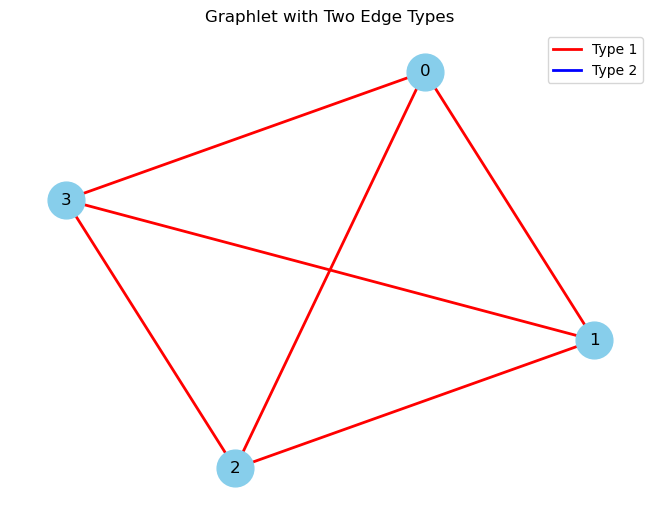

In [14]:
plot_graphlet_two_edge_types(tlist[5], k=4)

In [11]:

result = GEOMINE.Count(Example, 1, 4, 1, 2, True)
print(result)

Before: (11, 10)
After: (9, 10)
[1 1 2 0 0 0 0 0 0]


In [12]:
print(tlist.shape)

(6, 10)
